In [1]:
import numpy as np
import networkx as nx

In [2]:
TIME_HORIZON = 1400 # minutes
SEED = 42
np.random.seed(SEED)

In [3]:
uniform_arrivals = np.sort(np.random.uniform(360,1200,80).astype(int))

In [4]:
uniform_arrivals

array([ 364,  377,  388,  397,  399,  408,  414,  422,  422,  434,  442,
        457,  462,  477,  478,  491,  491,  503,  512,  514,  515,  524,
        526,  527,  538,  577,  587,  595,  604,  605,  615,  615,  621,
        633,  659,  661,  667,  674,  686,  722,  729,  743,  775,  791,
        796,  800,  815,  819,  857,  862,  862,  864,  870,  873,  916,
        934,  953,  954,  972,  974, 1007, 1008, 1011, 1019, 1033, 1039,
       1044, 1056, 1059, 1087, 1111, 1123, 1134, 1149, 1157, 1158, 1171,
       1174, 1174, 1188])

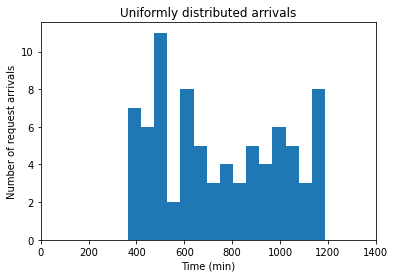

In [5]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(uniform_arrivals, 15, density=False)
plt.xlim([0, 1400])
plt.title("Uniformly distributed arrivals")
plt.ylabel("Number of request arrivals")
plt.xlabel("Time (min)")
plt.show()

## Simulate one episode

In [6]:
from modules.traffic_preprocess import TrafficPreprocessModule
from topologies.graph import Graph

In [7]:
def generate_random_node_pair(nodes_list):
    node_pair = []
    while len(node_pair) < 2:
        node_pair = np.random.choice(nodes_list, 2, replace=False)
    return node_pair

def load_topology(topology_dir):
    file = open(topology_dir, "rb")
    G = nx.read_edgelist(file)
    file.close()
    print(
        f'🏙️  Loaded topology with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.')
    return G

In [9]:
last_request_time = 0

G = load_topology("topologies/santiago.edgelist")
G_utils = Graph(G)

TPM = TrafficPreprocessModule(G)
traffic_network = TPM.get_traffic_network()
print(traffic_network.get_edge_data())

for t in range(TIME_HORIZON):
    traffic_network = TPM.get_traffic_network()
    if t in uniform_arrivals:
        # handle arrival
        nodes_labels = G_utils.get_nodes_labels(exclude_evcs=True)
        node_pair = generate_random_node_pair(nodes_labels)
        delta_t = t - last_request_time
        last_request_time = t

        print("Arrival at {}, delta_t: {}, node pair: {}".format(t, delta_t, node_pair))

🏙️  Loaded topology with 33 nodes and 49 edges.
[('EVCS10', '23'), ('EVCS10', '21'), ('23', '7'), ('23', '8'), ('21', '8'), ('21', '26'), ('21', '22'), ('7', '8'), ('7', '6'), ('7', '9'), ('8', '14'), ('6', '9'), ('6', 'EVCS8'), ('9', '10'), ('EVCS8', '1'), ('1', '10'), ('1', '2'), ('10', '14'), ('10', '11'), ('14', '25'), ('14', '13'), ('26', '20'), ('26', '25'), ('26', '5'), ('22', '20'), ('20', '19'), ('20', 'EVCS9'), ('25', 'EVCS1'), ('5', 'EVCS4'), ('5', '15'), ('5', '19'), ('EVCS1', '13'), ('13', '11'), ('13', '12'), ('11', '3'), ('11', '12'), ('3', 'EVCS3'), ('3', '4'), ('EVCS3', '2'), ('4', 'EVCS4'), ('4', '12'), ('15', '16'), ('19', 'EVCS7'), ('16', '18'), ('16', '17'), ('18', 'EVCS2'), ('18', 'EVCS7'), ('17', 'EVCS2'), ('17', 'EVCS9')]
Arrival at 364, delta_t: 364, node pair: ['18' '3']
Arrival at 377, delta_t: 13, node pair: ['10' '25']
Arrival at 388, delta_t: 11, node pair: ['23' '4']
Arrival at 397, delta_t: 9, node pair: ['16' '19']
Arrival at 399, delta_t: 2, node pair:

In [9]:
range(TIME_HORIZON)[-1]

1399